In [1]:
# get movie information from IMDb
from imdb import IMDb
ia = IMDb()
movie_list = []
for number in range(1, 20): # get first 19 movies
    movie_id = str(number).zfill(7)
    current_movie = ia.get_movie(movie_id)
    if len(current_movie) > 0: # if movie found by id
        movie_list.append(current_movie)
        
# write movie list into disk
import pickle
with open("test.txt", "wb") as myfile:
    pickle.dump(movie_list, myfile)

In [2]:
# TMDb API
import httplib
from skimage import io

In [3]:
def tmdb_get_latest_movie():
    api_key = "7fbe755e9e83c66a573c6482cefd23ed"
    conn = httplib.HTTPSConnection("api.themoviedb.org")
    conn.request("GET", 
                 "/3/movie/latest?api_key="+api_key, 
                 "{}")
    return conn.getresponse().read().decode("utf-8")

def tmdb_get_movie_by_imdb_id(imdb_id):
    api_key = "7fbe755e9e83c66a573c6482cefd23ed"
    conn = httplib.HTTPSConnection("api.themoviedb.org")
    conn.request("GET", 
                 "/3/find/tt"+str(imdb_id)+"?api_key="+api_key+"&external_source=imdb_id", 
                 "{}")
    return conn.getresponse().read().decode("utf-8")

def tmdb_get_movie_by_tmdb_id(tmdb_id):
    api_key = "7fbe755e9e83c66a573c6482cefd23ed"
    conn = httplib.HTTPSConnection("api.themoviedb.org")
    conn.request("GET", 
                 "/3/movie/"+str(tmdb_id)+"?api_key="+api_key, 
                 "{}")
    return conn.getresponse().read().decode("utf-8")

def tmdb_get_adult(text):
    return text.split("\"adult\":")[1].split(",")[0]

def tmdb_get_collection(text):
    return text.split("\"belongs_to_collection\":")[1].split(",")[0]

def tmdb_get_budget(text):
    return text.split("\"budget\":")[1].split(",")[0]

def tmdb_get_genre(text):
    genre_list = []
    subtext_list = text.split("\"genres\":[")[1].split("],")[0].split("name")[1::]
    for subtext in subtext_list:
        genre_list.append(subtext.split("\":\"")[1].split("\"}")[0])
    return genre_list

def tmdb_get_tmdb_id(text):
    subtext = text.split("homepage")[1].split("imdb")[0]
    start_index = subtext.find("\"id\":")
    return subtext[start_index+5:start_index+11]

def tmdb_get_imdb_id(text):
    start_index = text.find("imdb_id\":\"tt")
    return text[start_index+12:start_index+19]

def tmdb_get_title(text):
    return text.split("\"original_title\":\"")[1].split("\",")[0]

def tmdb_get_overview(text):
    return text.split("\"overview\":\"")[1].split(".\"")[0]+"."

def tmdb_get_production_companies(text):
    company_list = []
    subtext_list = text.split("\"production_companies\":[")[1].split("],")[0].split("name")[1::]
    for subtext in subtext_list:
        company_list.append(subtext.split("\":\"")[1].split("\"")[0])
    return company_list

def tmdb_get_production_countries(text):
    country_list = []
    subtext_list = text.split("\"production_countries\":[")[1].split("],")[0].split("name")[1::]
    for subtext in subtext_list:
        country_list.append(subtext.split("\":\"")[1].split("\"")[0])
    return country_list

def tmdb_get_release_date(text):
    return text.split("\"release_date\":\"")[1].split("\",")[0]

def tmdb_get_runtime(text):
    return text.split("\"runtime\":")[1].split(",")[0]

def tmdb_get_spoken_languages(text):
    lang_list = []
    subtext_list = text.split("\"spoken_languages\":[")[1].split("],")[0].split("name")[1::]
    for subtext in subtext_list:
        lang_list.append(subtext.split("\":\"")[1].split("\"")[0])
    return lang_list

def tmdb_get_poster_url(text):
    poster_id = text.split(".jpg")[0].split("/")[1]
    poster_url = "https://image.tmdb.org/t/p/w500/" + poster_id + ".jpg"
    return poster_url

movie title: Ghost in the Shell
IMDb id: 1219827
TMDb id: 315837
genre: [u'Action', u'Drama', u'Science Fiction']
movie poster:


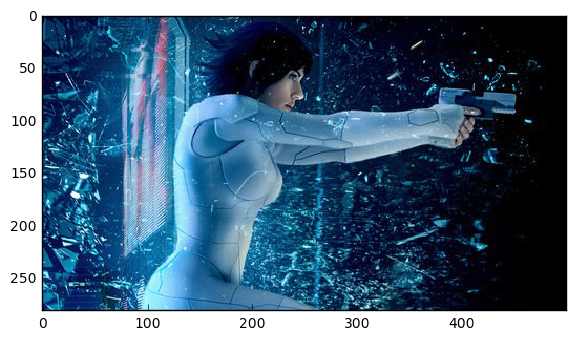

In [6]:
# sample movie TMDb id
movie_tmdb_id = 315837

# get movie data text
text = tmdb_get_movie_by_tmdb_id(movie_tmdb_id)

print "movie title:", tmdb_get_title(text)
print "IMDb id:", tmdb_get_imdb_id(text)
print "TMDb id:", tmdb_get_tmdb_id(text)
print "genre:", tmdb_get_genre(text)
print "movie poster:"
poster_url = tmdb_get_poster_url(text)

# get poster from url
io.imshow(io.imread(poster_url))
io.show()

In [ ]:
import time
import sys

latest_movie_text = tmdb_get_latest_movie()
latest_movie_tmdb_id = tmdb_get_tmdb_id(latest_movie_text)
time.sleep(3)

movie_text_list = []

for current_id in range(0, int(latest_movie_tmdb_id)+1):
    current_id_string = str(current_id).zfill(6)
    current_movie_text = tmdb_get_movie_by_tmdb_id(current_id_string)
    time.sleep(3)
    movie_text_list.append(current_movie_text)
    print "\rdownloaded movie id {}".format(current_id_string),
    sys.stdout.flush()
    
with open("~/tmdb_all_movie_text.txt", "wb") as myfile:
    pickle.dump(movie_text_list, myfile)

downloaded movie id 000003